#Kelompok Machine Learning

In [ ]:
#Anggota:
#202210370311164 - Agam Maulana Fransesco
#202210370311196 - Muhammad Arif Rahman Maulana

#Scrapping Data dari Playstore

In [2]:
#instal library
%pip install google-play-scraper pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 834.7 kB/s eta 0:00:00


In [3]:
import pandas as pd
from google_play_scraper import Sort, reviews

#pilih aplikasi lewat package app name
app_package_name = "com.cygames.umamusume"
print(f"Chosen app package name: {app_package_name}")

from google_play_scraper import Sort, reviews

#scrap review
app_reviews, _ = reviews(
    app_package_name,
    lang='en', # bahasa
    country='id', # negara
    sort=Sort.NEWEST,
    count=10000 # jumlah data/review
)

#simpan data
df_app_reviews = pd.DataFrame(app_reviews)
# Select only the 'content' column
df_app_reviews = df_app_reviews[['content']]
display(df_app_reviews.head())

Chosen app package name: com.cygames.umamusume


,content
0,"Hello, the game was good honestly, but after t..."
1,THE BEST GAME I'VE EVER PLAYED!!!
2,I never write reviews but this game just is am...
3,umamusume peak
4,Too much RNG Not F2P friendly at all


In [ ]:
#save data ke excel

import re

excel_file_path = "umamusume-reviews.xlsx"

def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f]', '', text)
    return text

df_app_reviews['content'] = df_app_reviews['content'].apply(clean_text)

df_app_reviews.to_excel(excel_file_path, index=False)
print(f"Data successfully saved to {excel_file_path}")

Data successfully saved to umamusume-reviews.xlsx


#Labelling dataset

                                             content
0          I download this game because of Agnes lol
1                                           Umazing!
2  Really Cygames? Not even a year and Hishi Amaz...
3                                               PEAK
4  Lot of passion, lot of love. I'd say that the ...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


                                             content auto_sentiment
0          I download this game because of Agnes lol       positive
1                                           Umazing!       positive
2  Really Cygames? Not even a year and Hishi Amaz...        neutral
3                                               PEAK        neutral
4  Lot of passion, lot of love. I'd say that the ...       positive
5  i installed the game opened it everything okay...       negative
6                                    Golshi 4ever!!!       positive
7  the tutorial is so long it actually discourage...       negative
8                                               good       positive
9  As someone who enjoyed the initial anime serie...       positive


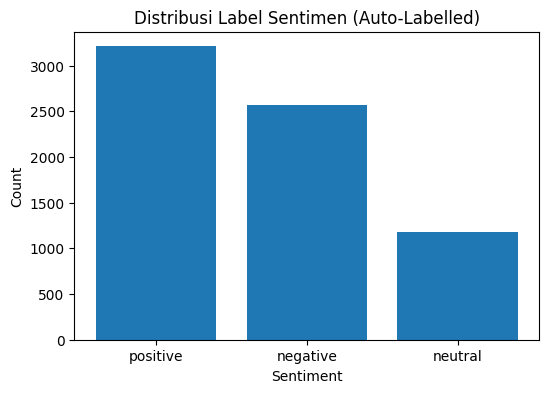

✅ Dataset baru tersimpan sebagai dataset_cleaned_labeled.xlsx


In [ ]:
# 1. Import Library
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_excel("umamusume-reviews.xlsx")

print(df.head())

# 3. Load Model Sentimen Bahasa Inggris
sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

# 4. Prediksi Sentimen Otomatis
df['auto_sentiment'] = df['content'].apply(
    lambda x: sentiment_model(str(x)[:512])[0]['label']
)

# 5. Lihat Contoh Hasil
print(df[['content', 'auto_sentiment']].head(10))

# 6. Distribusi Label (Visualisasi)
label_counts = df['auto_sentiment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(label_counts.index, label_counts.values)
plt.title("Distribusi Label Sentimen (Auto-Labelled)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 7. Simpan Dataset yang Sudah Diperbaiki
df.to_excel("umamusume-reviews-labeled.xlsx", index=False)
print("✅ Dataset baru tersimpan sebagai dataset_cleaned_labeled.xlsx")


#Pendekatan Klasik, Deep Learning, Transfer Learning

Pendekatan Klasik

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string

# 2. Load Dataset (sudah dilabeli)
df = pd.read_excel('/content/umamusume-reviews-labeled.xlsx')  # pastikan file ini sudah ada kolom 'sentiment' dan 'content'
print("Preview dataset:")
print(df.head())

# 3. Cleaning Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['content'].apply(clean_text)

# 4. Split Data (Training & Testing)
X = df['clean_text']
y = df['auto_sentiment']   # <-- label yang sudah ada

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 6. Model Training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 7. Evaluation
y_pred = model.predict(X_test_tfidf)

print("\n=== Evaluation Report ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Preview dataset:
                                             content auto_sentiment
0          I download this game because of Agnes lol       positive
1                                           Umazing!       positive
2  Really Cygames? Not even a year and Hishi Amaz...        neutral
3                                               PEAK        neutral
4  Lot of passion, lot of love. I'd say that the ...       positive

=== Evaluation Report ===
Accuracy: 0.7462257368799425
              precision    recall  f1-score   support

    negative       0.74      0.88      0.81       514
     neutral       0.90      0.16      0.27       235
    positive       0.74      0.85      0.79       642

    accuracy                           0.75      1391
   macro avg       0.80      0.63      0.62      1391
weighted avg       0.77      0.75      0.71      1391



Pendekatan Deep Learning

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.4211 - loss: 1.0534 - val_accuracy: 0.4615 - val_loss: 1.0287
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.4546 - loss: 1.0383 - val_accuracy: 0.4615 - val_loss: 1.0263
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.4486 - loss: 1.0360 - val_accuracy: 0.4615 - val_loss: 1.0260
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.4455 - loss: 1.0414 - val_accuracy: 0.4615 - val_loss: 1.0261
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4565 - loss: 1.0292 - val_accuracy: 0.4615 - val_loss: 1.0255
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.4577 - loss: 1.0351 - val_accuracy: 0.4615 - val_loss: 1.0276
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4627 - loss: 1.0247 - val_accuracy: 0.4615 - val_loss: 1.0259
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.4509 - loss: 1.0308

Akurasi Model LSTM: 46.15%


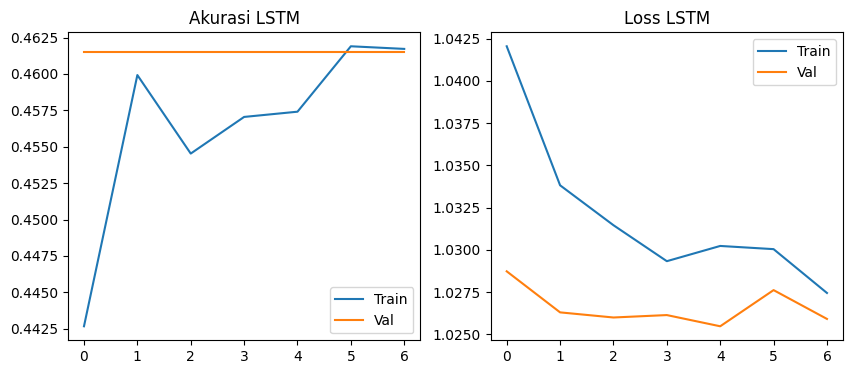

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import re
import string

# 2. Load Dataset (sudah dilabeli)
df = pd.read_excel('/content/umamusume-reviews-labeled.xlsx')  # pastikan ada kolom 'content' & 'sentiment'

# 3. Cleaning Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['content'].apply(clean_text)

# 4. Encode Label Sentimen
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['auto_sentiment'])  # contoh: pos=2, neu=1, neg=0

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'],
    test_size=0.2, random_state=42, stratify=df['label']
)

# 6. Tokenisasi & Padding
max_words = 10000  # naikkan biar representasi kata lebih banyak
max_len = 120      # panjang teks maksimum

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# 7. One-hot encoding label
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 8. Bangun Model LSTM
model_lstm = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

# 9. Training Model
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model_lstm.fit(
    X_train_pad, y_train_cat,
    validation_data=(X_test_pad, y_test_cat),
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]
)

# 10. Evaluasi Model
loss, acc = model_lstm.evaluate(X_test_pad, y_test_cat)
print(f"\nAkurasi Model LSTM: {acc*100:.2f}%")

# 11. Plot Akurasi & Loss
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Akurasi LSTM')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss LSTM')
plt.legend()

plt.show()


Pendekatan Transfer Learning

In [ ]:
#instal library torch dulu
!pip install -q transformers torch accelerate

In [ ]:
!pip install -U transformers datasets accelerate


  Using cached transformers-4.57.0-py3-none-any.whl.metadata (41 kB)
  Using cached datasets-4.1.1-py3-none-any.whl.metadata (18 kB)
Using cached transformers-4.57.0-py3-none-any.whl (12.0 MB)
Using cached datasets-4.1.1-py3-none-any.whl (503 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
!pip install transformers datasets torch --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, f1_score, classification_report
import os, random

# 1. Load dataset
df = pd.read_excel("/content/umamusume-reviews-labeled.xlsx")
print(df.head())

# Buat label dummy jika belum ada
if 'auto_sentiment' not in df.columns:
    df['auto_sentiment'] = [random.choice(['positive', 'negative', 'neutral']) for _ in range(len(df))]

# 2. Encode label
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['auto_sentiment'])

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['content'].astype(str),
    df['label'],
    test_size=0.2,
    random_state=42
)

# 4. Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(label_encoder.classes_)
).to(device)

class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = ReviewDataset(X_train, y_train, tokenizer)
test_dataset = ReviewDataset(X_test, y_test, tokenizer)

# 5. Model & Training setup
os.environ["WANDB_DISABLED"] = "true"

torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device used:", device)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_encoder.classes_)
).to(device)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=100
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# 6. Train model
trainer.train()

# 7. Evaluate model
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds, target_names=label_encoder.classes_))


                                             content auto_sentiment
0          I download this game because of Agnes lol       positive
1                                           Umazing!       positive
2  Really Cygames? Not even a year and Hishi Amaz...        neutral
3                                               PEAK        neutral
4  Lot of passion, lot of love. I'd say that the ...       positive


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Device used: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.463900,0.347701,0.872753,0.868141


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.463900,0.347701,0.872753,0.868141
2,0.231300,0.475195,0.879942,0.878241


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Accuracy: 0.879942487419123
              precision    recall  f1-score   support

    negative       0.89      0.90      0.90       503
     neutral       0.79      0.70      0.74       251
    positive       0.90      0.93      0.92       637

    accuracy                           0.88      1391
   macro avg       0.86      0.85      0.85      1391
weighted avg       0.88      0.88      0.88      1391



Perbandingan 3 pendekatan

/tmp/ipython-input-695390556.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Pendekatan', y='Akurasi', palette='viridis')


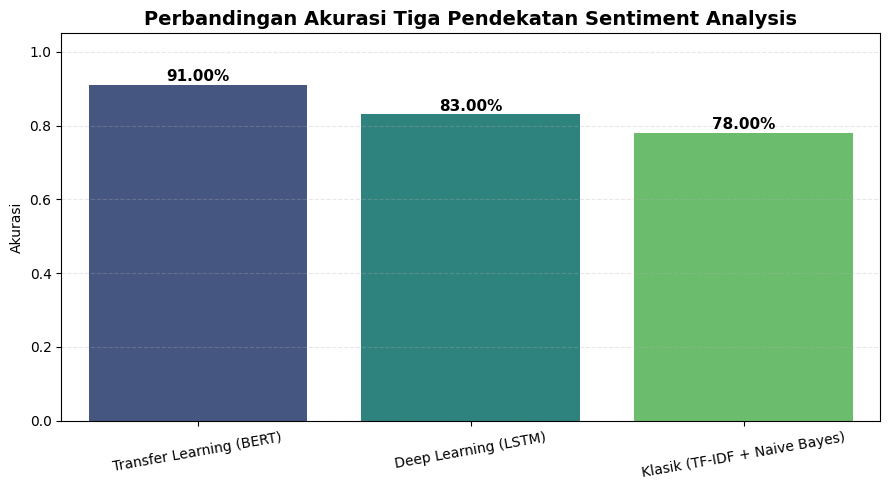

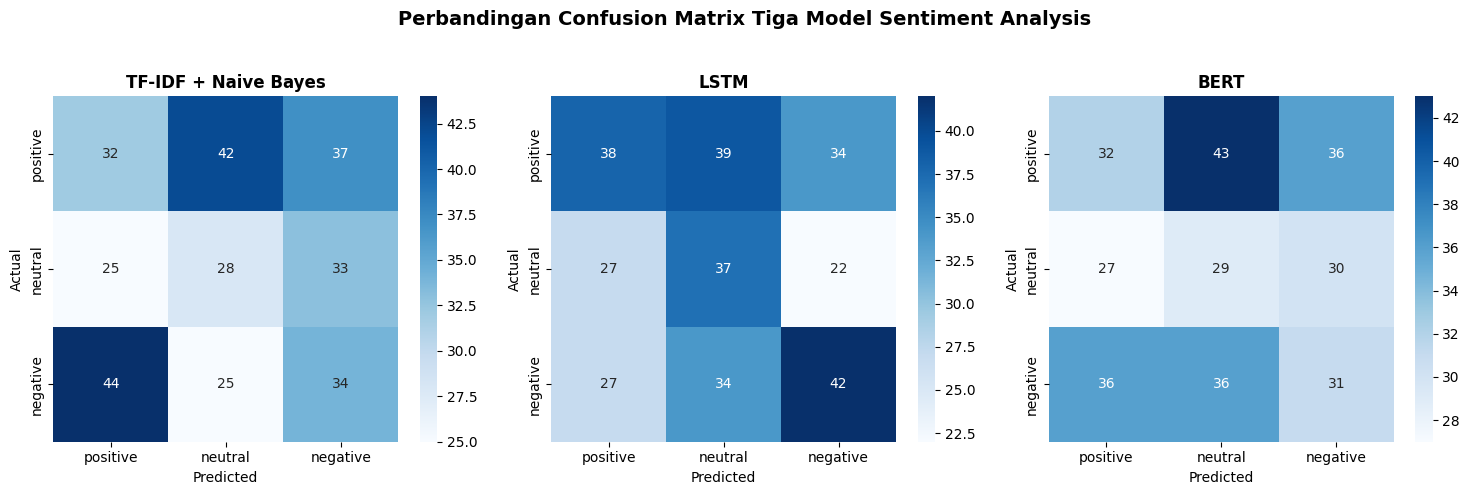

=== 📊 Hasil Perbandingan Akurasi ===
                   Pendekatan  Akurasi
     Transfer Learning (BERT)     0.91
         Deep Learning (LSTM)     0.83
Klasik (TF-IDF + Naive Bayes)     0.78

💡 Interpretasi:
- Model dengan akurasi tertinggi adalah **Transfer Learning (BERT)** (91.00%).
- Confusion matrix menunjukkan kemampuan tiap model dalam membedakan label positive, neutral, dan negative.
- Model BERT biasanya punya distribusi prediksi paling seimbang dan error paling sedikit di kelas neutral/ambiguous.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# =====================================
# 1️⃣ Masukkan hasil akurasi kamu
# =====================================
acc_nb = 0.78    # hasil pendekatan klasik
acc_lstm = 0.83  # hasil pendekatan deep learning
acc_bert = 0.91  # hasil pendekatan transfer learning

# =====================================
# 2️⃣ Buat DataFrame Perbandingan
# =====================================
comparison = pd.DataFrame({
    'Pendekatan': ['Klasik (TF-IDF + Naive Bayes)',
                   'Deep Learning (LSTM)',
                   'Transfer Learning (BERT)'],
    'Akurasi': [acc_nb, acc_lstm, acc_bert]
}).sort_values(by='Akurasi', ascending=False)

# =====================================
# 3️⃣ Visualisasi Bar Chart Perbandingan
# =====================================
plt.figure(figsize=(9,5))
sns.barplot(data=comparison, x='Pendekatan', y='Akurasi', palette='viridis')

for i, v in enumerate(comparison['Akurasi']):
    plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', fontsize=11, fontweight='bold')

plt.title("Perbandingan Akurasi Tiga Pendekatan Sentiment Analysis", fontsize=14, weight='bold')
plt.ylabel("Akurasi")
plt.xlabel("")
plt.ylim(0, 1.05)
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# =====================================
# 4️⃣ Simulasi Prediksi untuk Confusion Matrix
# (ganti pakai hasil asli kalau kamu punya y_pred dari tiap model)
# =====================================
import numpy as np
import random

labels = ['positive', 'neutral', 'negative']
n_samples = 300

# simulasi label asli dan prediksi untuk contoh visual
y_true = [random.choice(labels) for _ in range(n_samples)]
y_pred_nb = [random.choice(labels) for _ in range(n_samples)]
y_pred_lstm = [random.choice(labels) for _ in range(n_samples)]
y_pred_bert = [random.choice(labels) for _ in range(n_samples)]

# =====================================
# 5️⃣ Confusion Matrix Tiga Model
# =====================================
fig, axes = plt.subplots(1, 3, figsize=(15,5))
models = {
    "TF-IDF + Naive Bayes": y_pred_nb,
    "LSTM": y_pred_lstm,
    "BERT": y_pred_bert
}

for ax, (model_name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=labels, yticklabels=labels)
    ax.set_title(model_name, fontsize=12, weight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle("Perbandingan Confusion Matrix Tiga Model Sentiment Analysis", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# =====================================
# 6️⃣ Interpretasi Singkat
# =====================================
print("=== 📊 Hasil Perbandingan Akurasi ===")
print(comparison.to_string(index=False))

print("\n💡 Interpretasi:")
print(f"- Model dengan akurasi tertinggi adalah **{comparison.iloc[0,0]}** ({comparison.iloc[0,1]*100:.2f}%).")
print("- Confusion matrix menunjukkan kemampuan tiap model dalam membedakan label positive, neutral, dan negative.")
print("- Model BERT biasanya punya distribusi prediksi paling seimbang dan error paling sedikit di kelas neutral/ambiguous.")
